In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("clean_data/gdp_per_capita.csv")

data.head(10)

,Unnamed: 0,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
1,2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
2,4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN
3,5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4578.633208,3952.803584,4124.055390,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519,NaN
4,6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45680.534990,38885.530324,39931.216982,40632.231554,42904.828456,41328.600499,37207.222000,42072.341103,41992.793358,NaN
5,8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46865.964598,41525.138904,41054.539570,43063.967479,46722.268719,45376.170839,37629.174168,44315.554184,53757.863251,NaN
6,9,Argentina,ARG,NaN,NaN,1163.186836,855.275656,1179.504098,1285.260799,1277.968419,...,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231,8496.428157,10636.115530,13686.008674,NaN
7,10,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4017.229913,3666.141825,3679.952349,4041.995072,4391.923274,4828.504889,4505.867746,4966.513471,7014.206592,NaN
8,11,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12313.997357,13101.541816,13300.824611,12372.884783,13195.935900,13672.576657,15501.526337,15743.310758,NaN,NaN
9,12,Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14004.811212,14861.882707,15862.651663,16110.312400,17514.355864,18187.779712,15284.772384,16740.348196,18745.173509,NaN


Germany


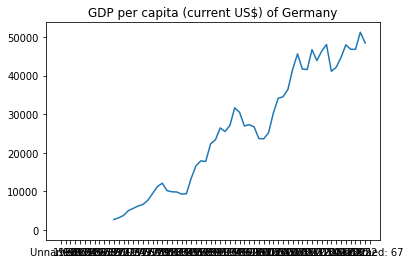

In [12]:
# example gdp graph
exmpl = data.iloc[50]
exmpl_country_name = exmpl.loc["Country Name"]

plt.plot(exmpl.drop(["Country Name", "Country Code"]))
plt.title(f"GDP per capita (current US$) of {exmpl_country_name}")
plt.show()

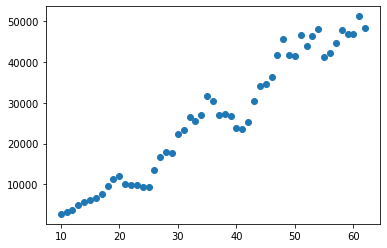

In [20]:
values = list(exmpl.drop(["Unnamed: 0", "Country Name", "Country Code"]))
X, y = [], []

for indx, val in enumerate(values):
    if pd.isna(val): continue
    y.append(val)
    X.append(indx)

plt.scatter(X, y)
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)


regressor = KNeighborsRegressor(n_neighbors=3)
regressor2 = LinearRegression()
regressor.fit(X, y)
regressor2.fit(X, y)

LinearRegression()

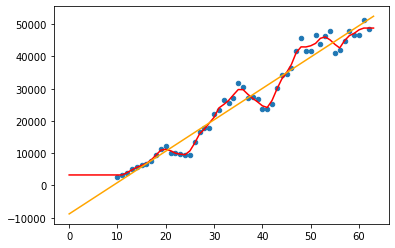

In [48]:
to_predict = np.arange(0.0, 64.0, 1.0)[:, np.newaxis]

prediction = regressor.predict(to_predict)
prediction2 = regressor2.predict(to_predict)

plt.scatter(X, y, s=20)
plt.plot(to_predict, prediction, color="red")
plt.plot(to_predict, prediction2, color="orange")
plt.show()

c:\Users\malik\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


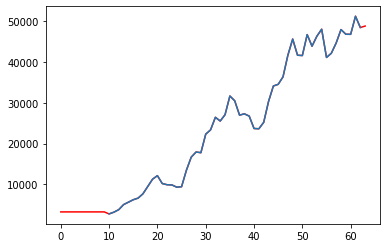

In [50]:
# merge original & interpolated values
merged_values = []

for indx, val in enumerate(values):
    if pd.isna(val):
        merged_values.append(prediction[indx])
    else:
        merged_values.append(val)

plt.plot(merged_values, color="red")
plt.plot(values)
plt.show()

In [51]:
pd.Series(merged_values)

0     [3254.4272978084605]
1     [3254.4272978084605]
2     [3254.4272978084605]
3     [3254.4272978084605]
4     [3254.4272978084605]
              ...         
59            46793.686762
60            46772.825351
61            51203.554473
62            48432.455873
63    [48802.945232372535]
Length: 64, dtype: object